# Objectives

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


In [ ]:
%pip install seaborn
%pip install folium
%pip install js

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import js
import requests

# Scenario

Creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>

recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

---


In [2]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data from the URL
response = requests.get(URL)

if response.status_code == 200:
    # Load the data into a Pandas DataFrame
    data = response.text
    df = pd.read_csv(StringIO(data))
    
    # Use describe() to generate summary statistics
    summary = df.describe()
    
else:
    print("Failed to fetch data:", response.status_code)


In [3]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


*Line chart*


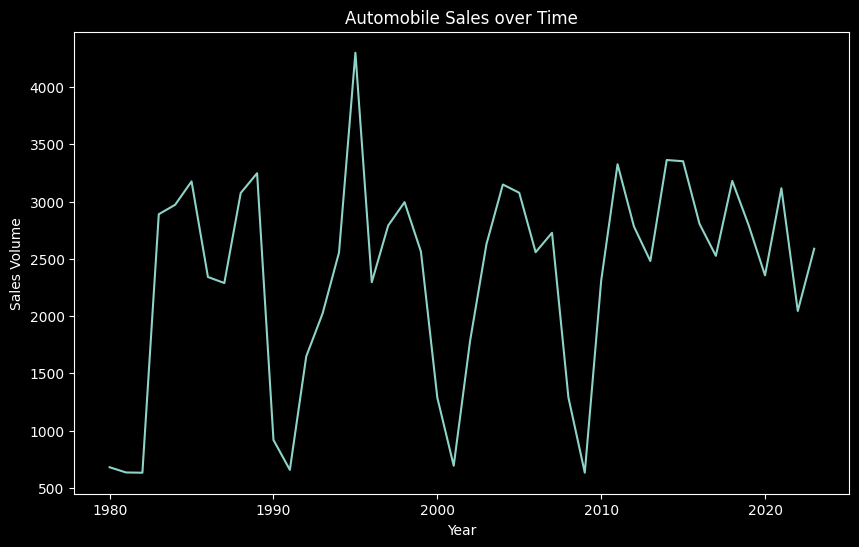

In [5]:
    #create data for plotting
    df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
    plt.figure(figsize=(10, 6))
    df_line.plot(kind = 'line')
    plt.xlabel('Year')
    plt.ylabel('Sales Volume')
    plt.title('Automobile Sales over Time')
    plt.show()

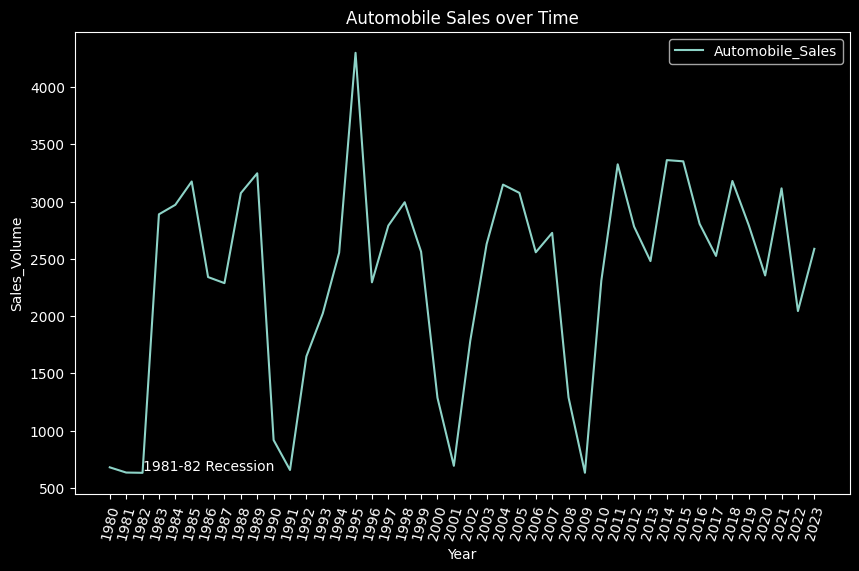

In [6]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales_Volume')
plt.title('Automobile Sales over Time')
plt.text(1982, 650, '1981-82 Recession')
# Add another annotation for a different year
plt.legend()
plt.show()



#### Plotting different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


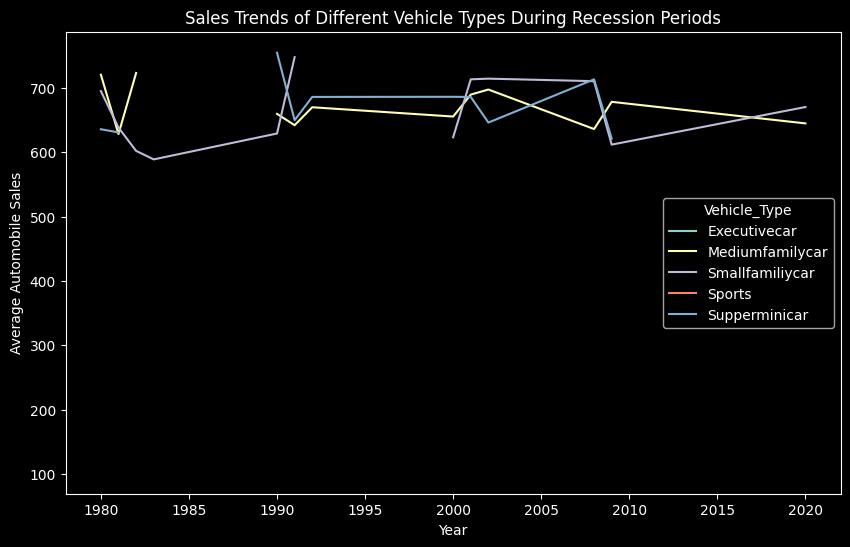

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Create a separate DataFrame for recession periods (where Recession column is 1)
recession_df = df[df['Recession'] == 1]

# Step 2: Group by year and vehicle_type, calculate average sales
grouped_df = recession_df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Step 3: Pivot the data to have years as index and vehicle types as columns
pivot_df = grouped_df.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales')

# Step 4: Plot the lines for different vehicle types
ax = pivot_df.plot(kind='line', figsize=(10, 6))

# Step 5: Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Automobile Sales')
ax.set_title('Sales Trends of Different Vehicle Types During Recession Periods')

# Display the plot
plt.show()


### Create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


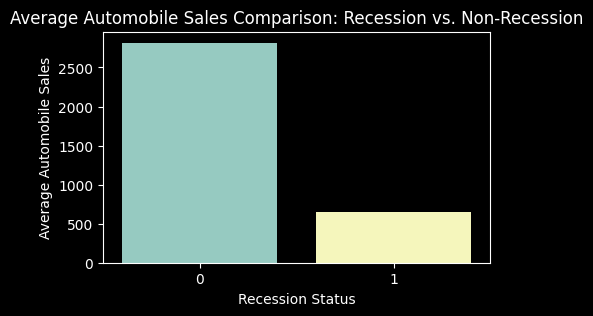

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Group by recession status and calculate average sales
recession_sales = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Step 2: Create a bar plot using Seaborn
plt.figure(figsize=(5, 3))
sns.barplot(x='Recession', y='Automobile_Sales', data=recession_sales)

# Step 3: Add labels and title
plt.xlabel('Recession Status')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales Comparison: Recession vs. Non-Recession')

# Display the plot
plt.show()


### Compare the sales of different vehicle types during a recession and a non-recession period



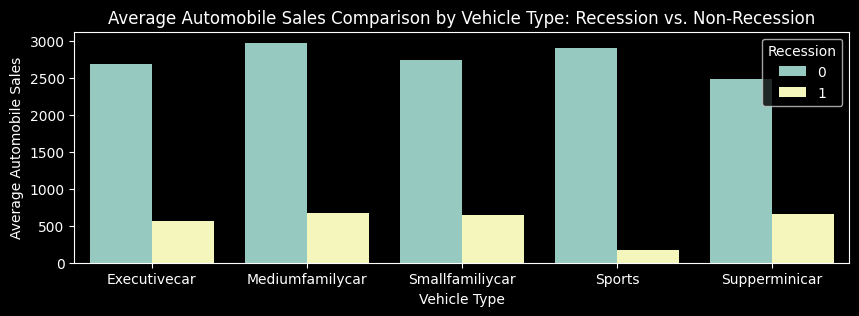

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Group by Recession and Vehicle_Type, and calculate average sales
recession_vehicle_sales = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Step 2: Create a grouped bar plot using Seaborn
plt.figure(figsize=(10, 3))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=recession_vehicle_sales)

# Step 3: Add labels and title
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales Comparison by Vehicle Type: Recession vs. Non-Recession')
plt.legend(title='Recession', loc='upper right')

# Display the plot
plt.show()



### Sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
Plot a two line charts using subplotting to answer -
#### Q. How did the GDP vary over time during recession and non-recession periods? 


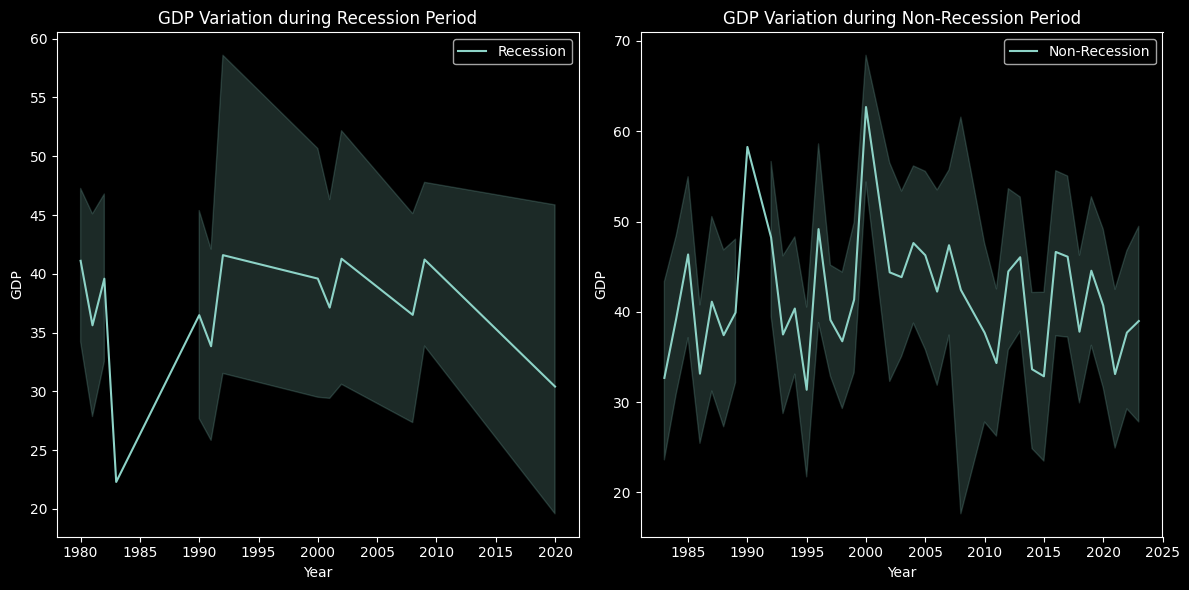

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1 - Recession Period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Subplot 2 - Non-Recession Period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()


### Bubble plot for displaying the impact of seasonality on Automobile Sales.
Q. How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend
##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble



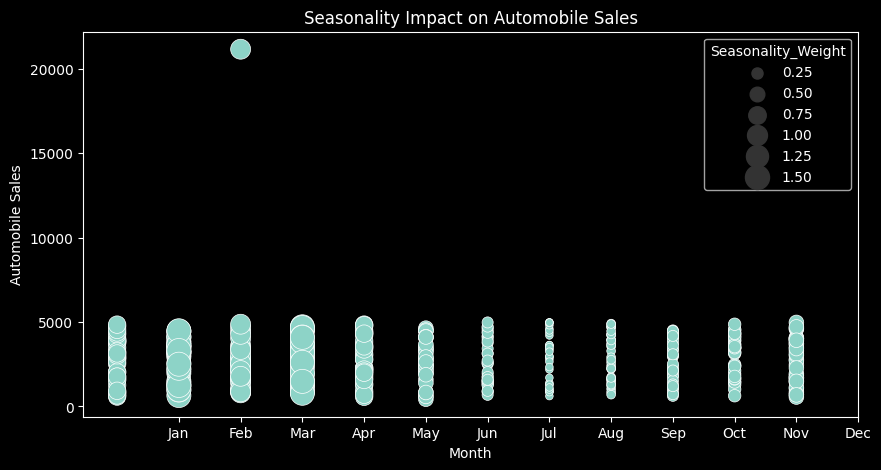

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter for non-recession years
non_recession_data = df[df['Recession'] == 0]

# Create a bubble plot using Seaborn
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Month', y='Automobile_Sales', size='Seasonality_Weight',
                sizes=(30, 300), data=non_recession_data)
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


 ### Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### Scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period.


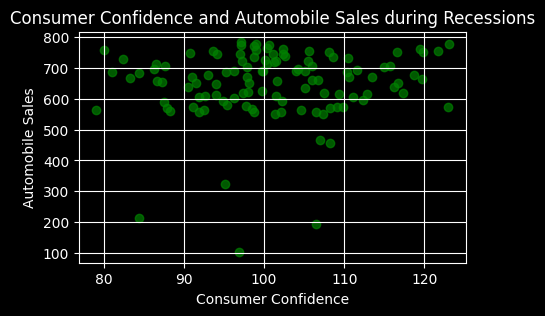

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Scatter plot: Consumer Confidence vs. Automobile Sales
plt.figure(figsize=(5, 3))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], color='green', alpha=0.7)
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.grid(True)
plt.show()



 ### How does the average vehicle price relate to the sales volume during recessions?


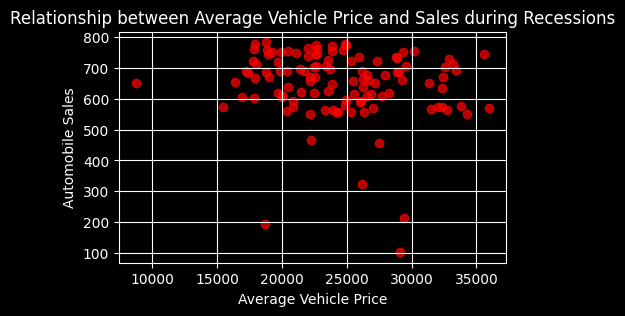

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Scatter plot: Average Vehicle Price vs. Sales Volume during Recessions
plt.figure(figsize=(5, 3))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], color='red', alpha=0.7)
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.grid(True)
plt.show()


 ### Creating a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.


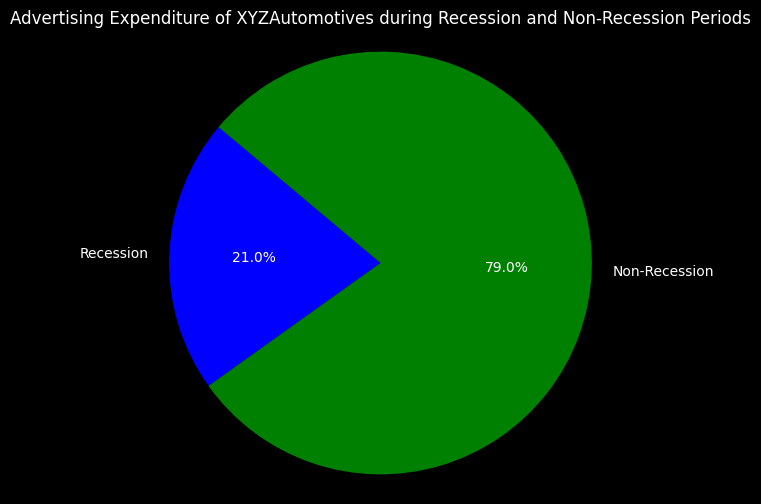

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total advertising expenditure for recession and non-recession periods
recession_ad_expenditure = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
non_recession_ad_expenditure = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

# Labels for the pie chart
labels = ['Recession', 'Non-Recession']

# Data for the pie chart
values = [recession_ad_expenditure, non_recession_ad_expenditure]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'green'])
plt.title('Advertising Expenditure of XYZAutomotives during Recession and Non-Recession Periods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### Pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>


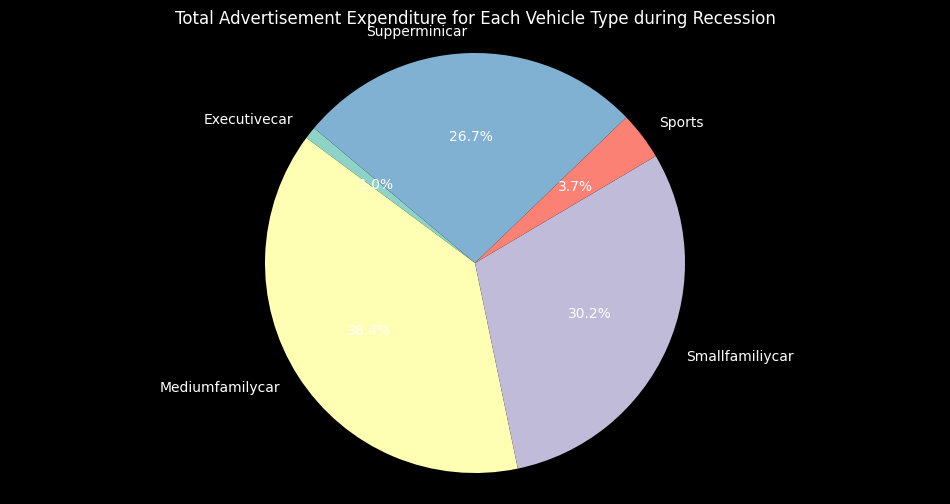

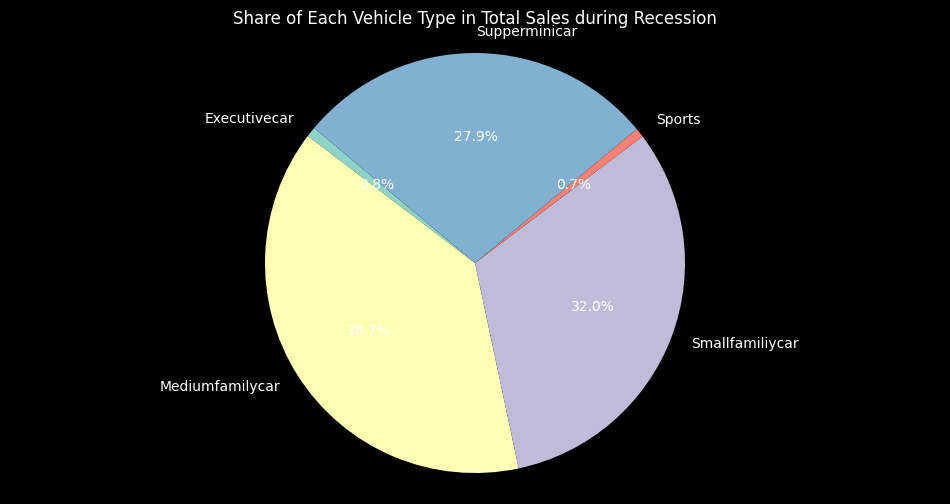

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the relevant data

# Filter data for recession periods
recession_data = df[df['Recession'] == 1]

# Calculate total advertisement expenditure for each vehicle type during recession
ad_exp_by_vehicle = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Calculate total sales for each vehicle type during recession
sales_by_vehicle = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum()

# Pie chart: Total Advertisement Expenditure for each Vehicle Type during Recession
plt.figure(figsize=(12, 6))
plt.pie(ad_exp_by_vehicle, labels=ad_exp_by_vehicle.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Advertisement Expenditure for Each Vehicle Type during Recession')
plt.axis('equal')
plt.show()

# Pie chart: Share of Each Vehicle Type in Total Sales during Recession
plt.figure(figsize=(12, 6))
plt.pie(sales_by_vehicle, labels=sales_by_vehicle.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Each Vehicle Type in Total Sales during Recession')
plt.axis('equal')
plt.show()


 ### Developing a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.


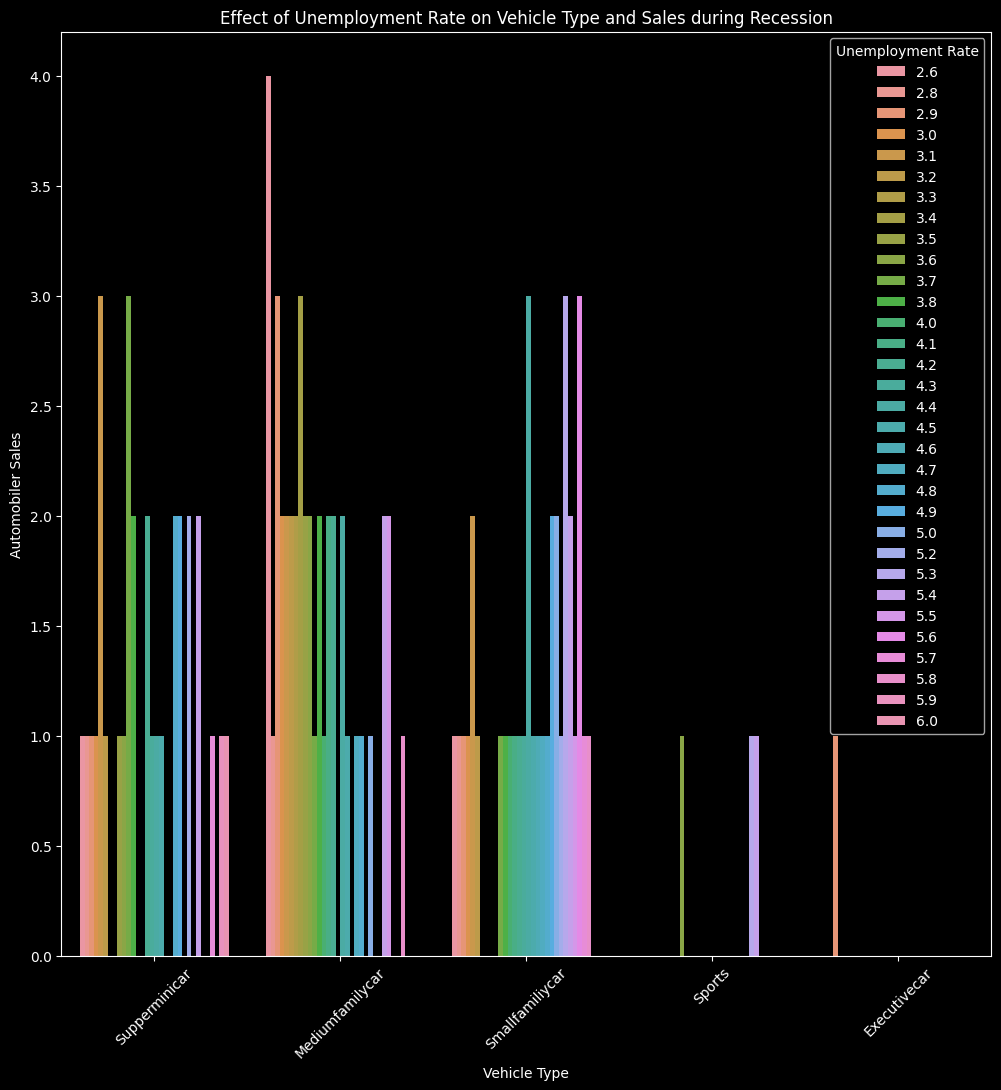

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the relevant data

# Filter data for recession periods
recession_data = df[df['Recession'] == 1]

# Create a countplot using Seaborn
plt.figure(figsize=(12, 12))
sns.countplot(data=recession_data, x='Vehicle_Type', hue='unemployment_rate')
plt.xlabel('Vehicle Type')
plt.ylabel('Automobiler Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession')
plt.legend(title='Unemployment Rate')
plt.xticks(rotation=45)

plt.show()


### Map on the hightest sales region/offices of the company during recession period


The city with the highest sales during the recession period is:
       City  Automobile_Sales
3  New York           19954.6


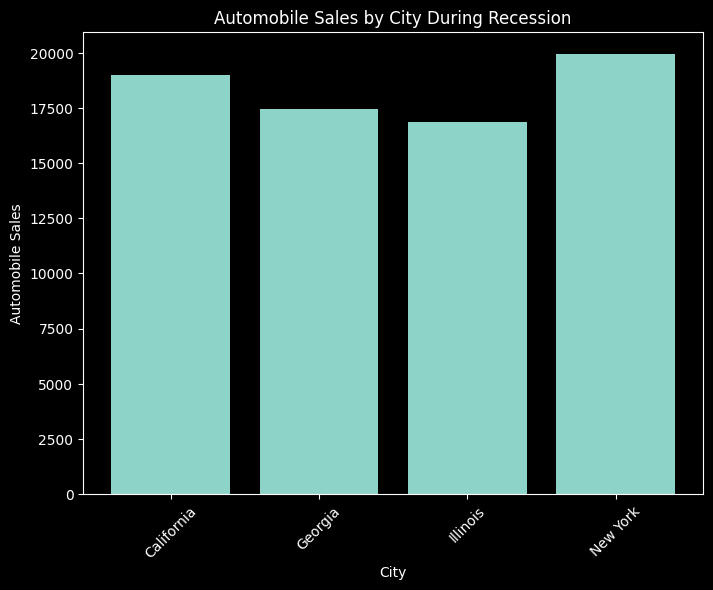

In [28]:
# Define the recession period
recession_period = df[df['Recession'] == 1]

# Group and sum sales by city during the recession period
sales_by_city = recession_period.groupby('City')['Automobile_Sales'].sum().reset_index()

# Find the city with the highest sales during the recession period
highest_sales_city = sales_by_city[sales_by_city['Automobile_Sales'] == sales_by_city['Automobile_Sales'].max()]

# Print the result
print("The city with the highest sales during the recession period is:")
print(highest_sales_city)

# If you have geographical coordinates, you can create a map here
# For simplicity, we'll plot a bar chart to visualize sales by city
plt.figure(figsize=(8, 6))
plt.bar(sales_by_city['City'], sales_by_city['Automobile_Sales'])
plt.xlabel('City')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales by City During Recession')
plt.xticks(rotation=45)
plt.show()

#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


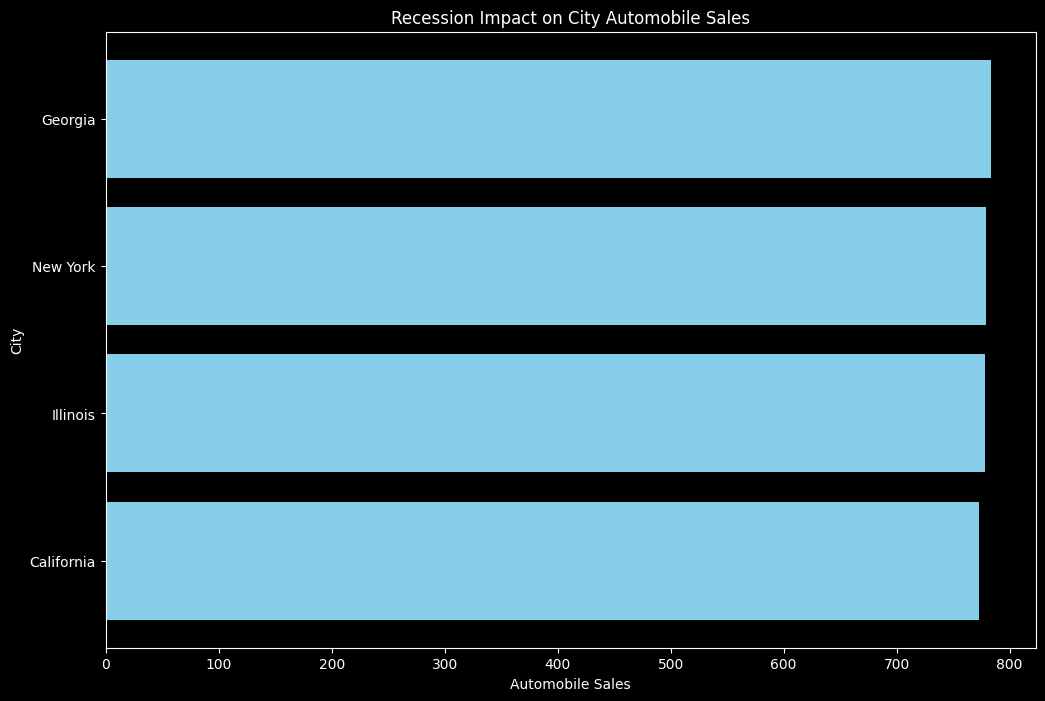

In [32]:
# Filter data for the recession period
recession_data = df[df['Recession'] == 1]

# Sort the data by 'Automobile_Sales' in descending order to highlight the highest sales
recession_data = recession_data.sort_values(by='Automobile_Sales', ascending=False)

# Create a bar chart to visualize the impact of the recession on city automobile sales
plt.figure(figsize=(12, 8))
plt.barh(recession_data['City'], recession_data['Automobile_Sales'], color='skyblue')
plt.xlabel('Automobile Sales')
plt.ylabel('City')
plt.title('Recession Impact on City Automobile Sales')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest sales at the top
plt.show()